In [2]:
%matplotlib inline
import Euclid
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from astropy.table import Table
from astropy import units as u
from astropy.units import photometric

In [3]:
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
t = Table.read('/home/aalvarez/Work/Data/SC7/PerPipeline/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/EUC_MER_FINAL-CAT_8BD1D7_20200424T080307.090421Z_00.00.fits')

In [14]:
ref_photo = Table.read('/home/aalvarez/Work/Data/SC7/ReferenceSample/EUC_PHZ_REFPHOT__20190528T122127.3Z_00.00.fits', hdu=1)

In [16]:
reference_sample_phot_filters = ['lsst_g', 'lsst_r', 'lsst_i', 'lsst_z', 'VIS', 'Y', 'J', 'H']

In [5]:
snr = t['FLUX_VIS_APER'] / t['FLUXERR_VIS_APER'] > 10
t = t[snr]

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [6]:
idx = np.arange(len(t))
np.random.shuffle(idx)
t = t[idx[:10000]]

In [8]:
t['FLUXERR_G_EXT_LSST_APER'].unit

Unit("uJy")

## Bands used in NNPZ

In [12]:
target_catalog_filters = [
    #('FLUX_U_EXT_LSST_APER', 'FLUXERR_U_EXT_LSST_APER'),
    ('FLUX_G_EXT_LSST_APER', 'FLUXERR_G_EXT_LSST_APER'),
    ('FLUX_R_EXT_LSST_APER', 'FLUXERR_R_EXT_LSST_APER'),
    ('FLUX_I_EXT_LSST_APER', 'FLUXERR_I_EXT_LSST_APER'),
    ('FLUX_Z_EXT_LSST_APER', 'FLUXERR_Z_EXT_LSST_APER'),
    ('FLUX_VIS_APER', 'FLUXERR_VIS_APER'),
    ('FLUX_Y_APER', 'FLUXERR_Y_APER'),
    ('FLUX_J_APER', 'FLUXERR_J_APER'),
    ('FLUX_H_APER', 'FLUXERR_H_APER')
]
n_filters = len(target_catalog_filters)

## Flux vs Error

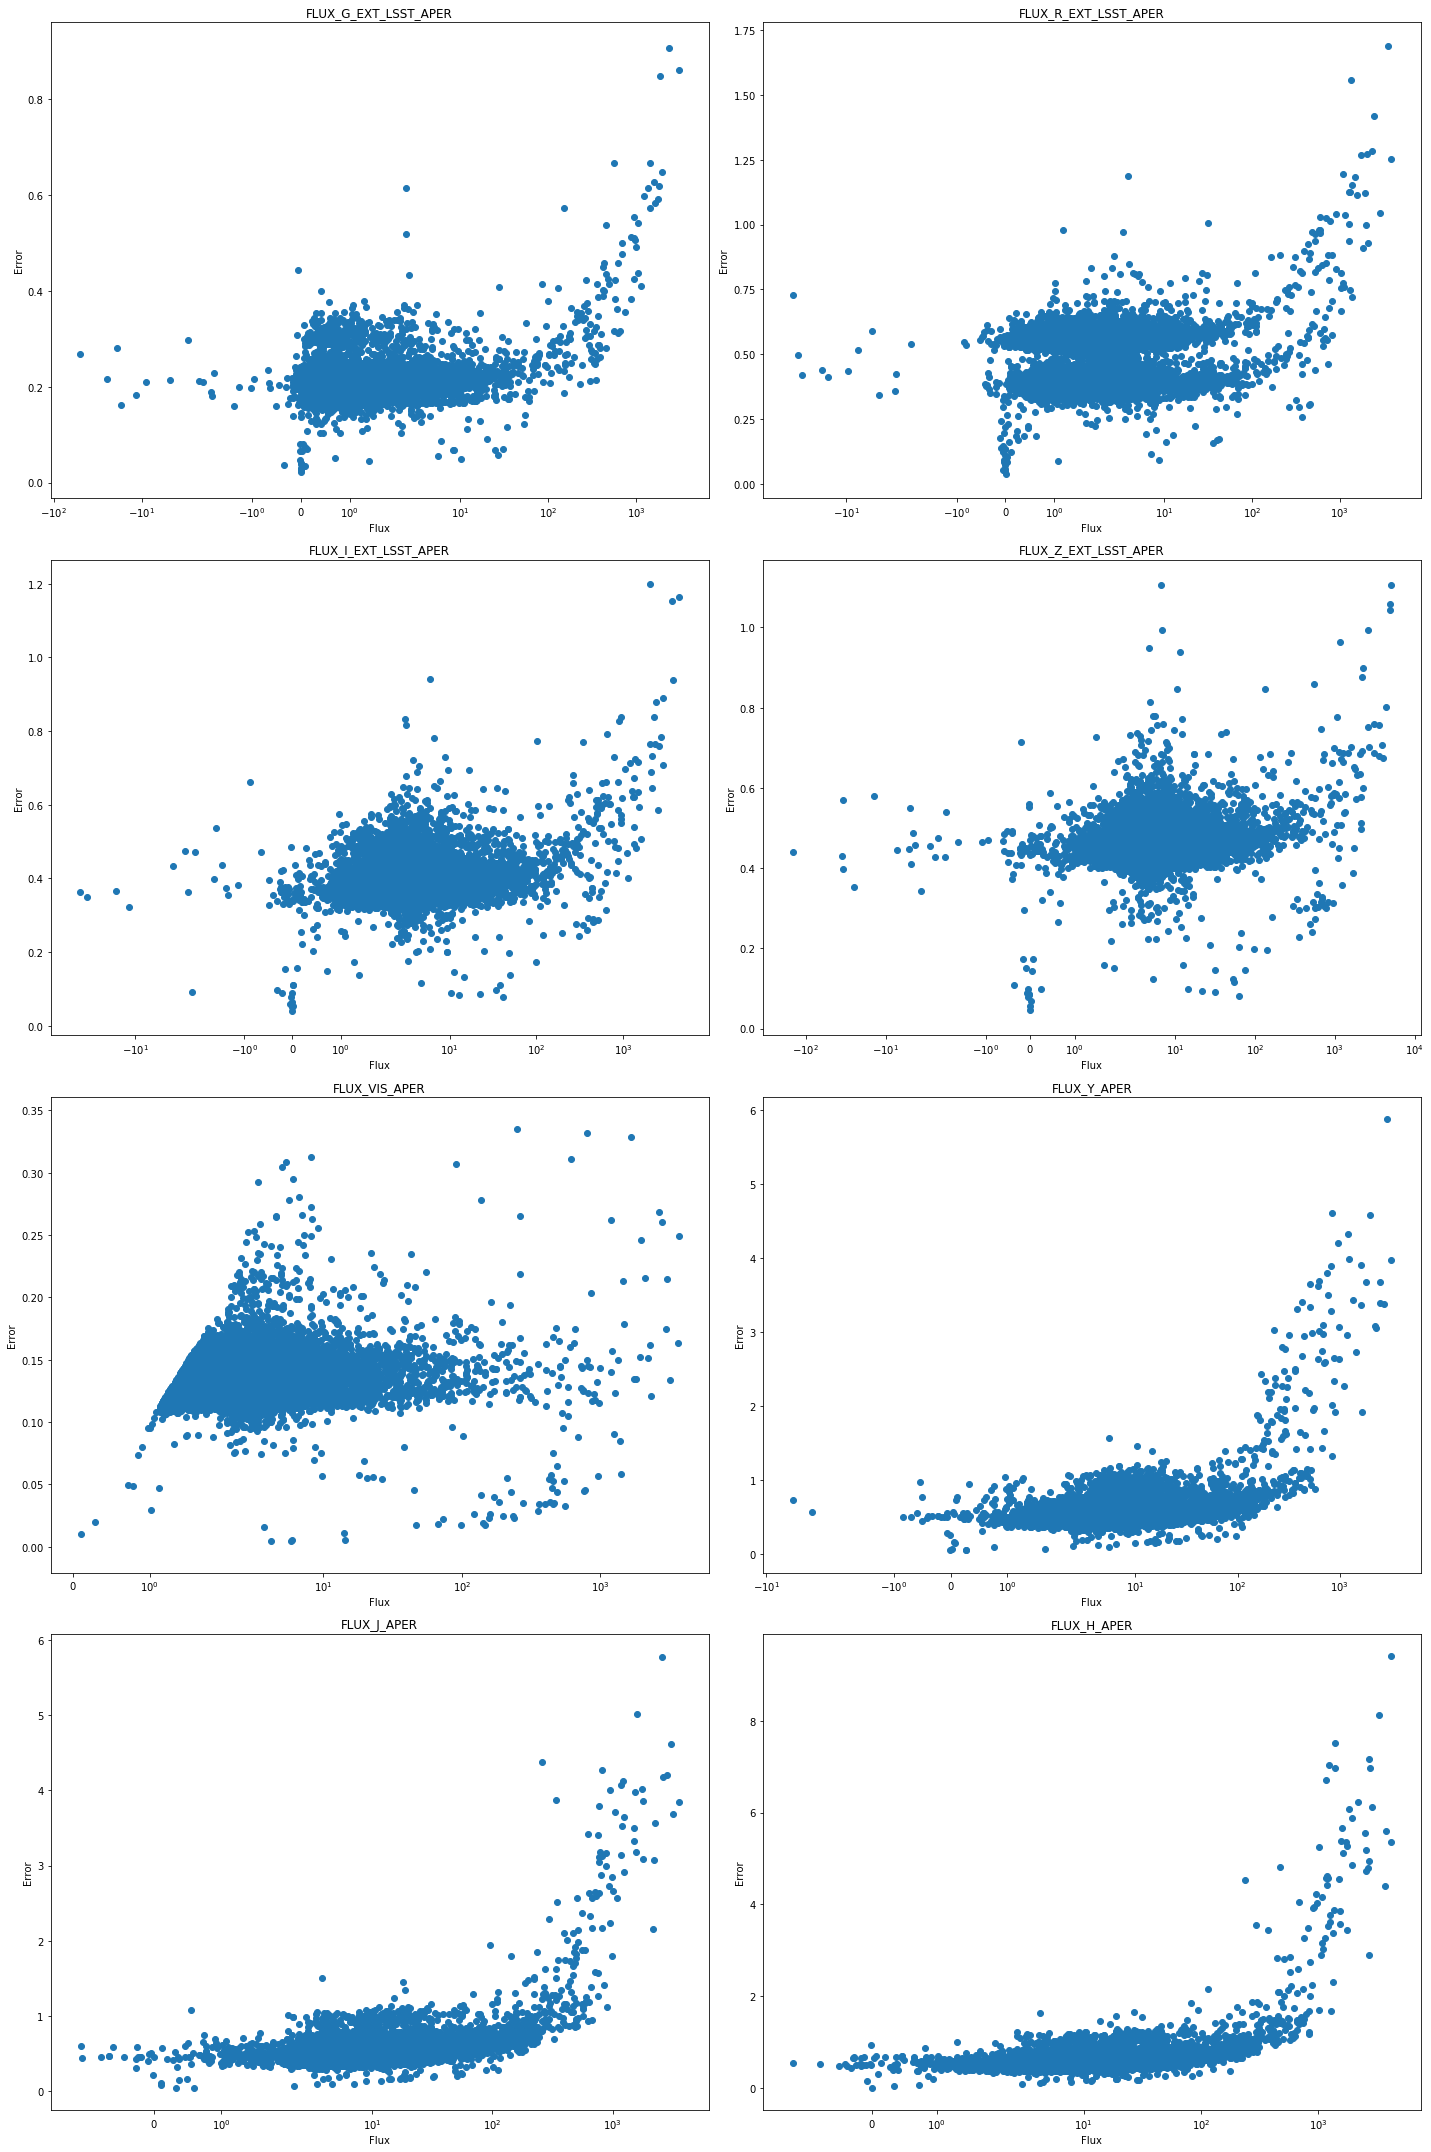

In [8]:
ncols = 2
nrows = n_filters // ncols + (n_filters % ncols > 0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 30))
axes = axes.ravel()

for i, (flux, error) in enumerate(target_catalog_filters):
    axes[i].scatter(t[flux], t[error])
    axes[i].set_title(flux)
    axes[i].set_xscale('symlog')
    axes[i].set_xlabel('Flux')
    axes[i].set_ylabel('Error')
    
plt.tight_layout()

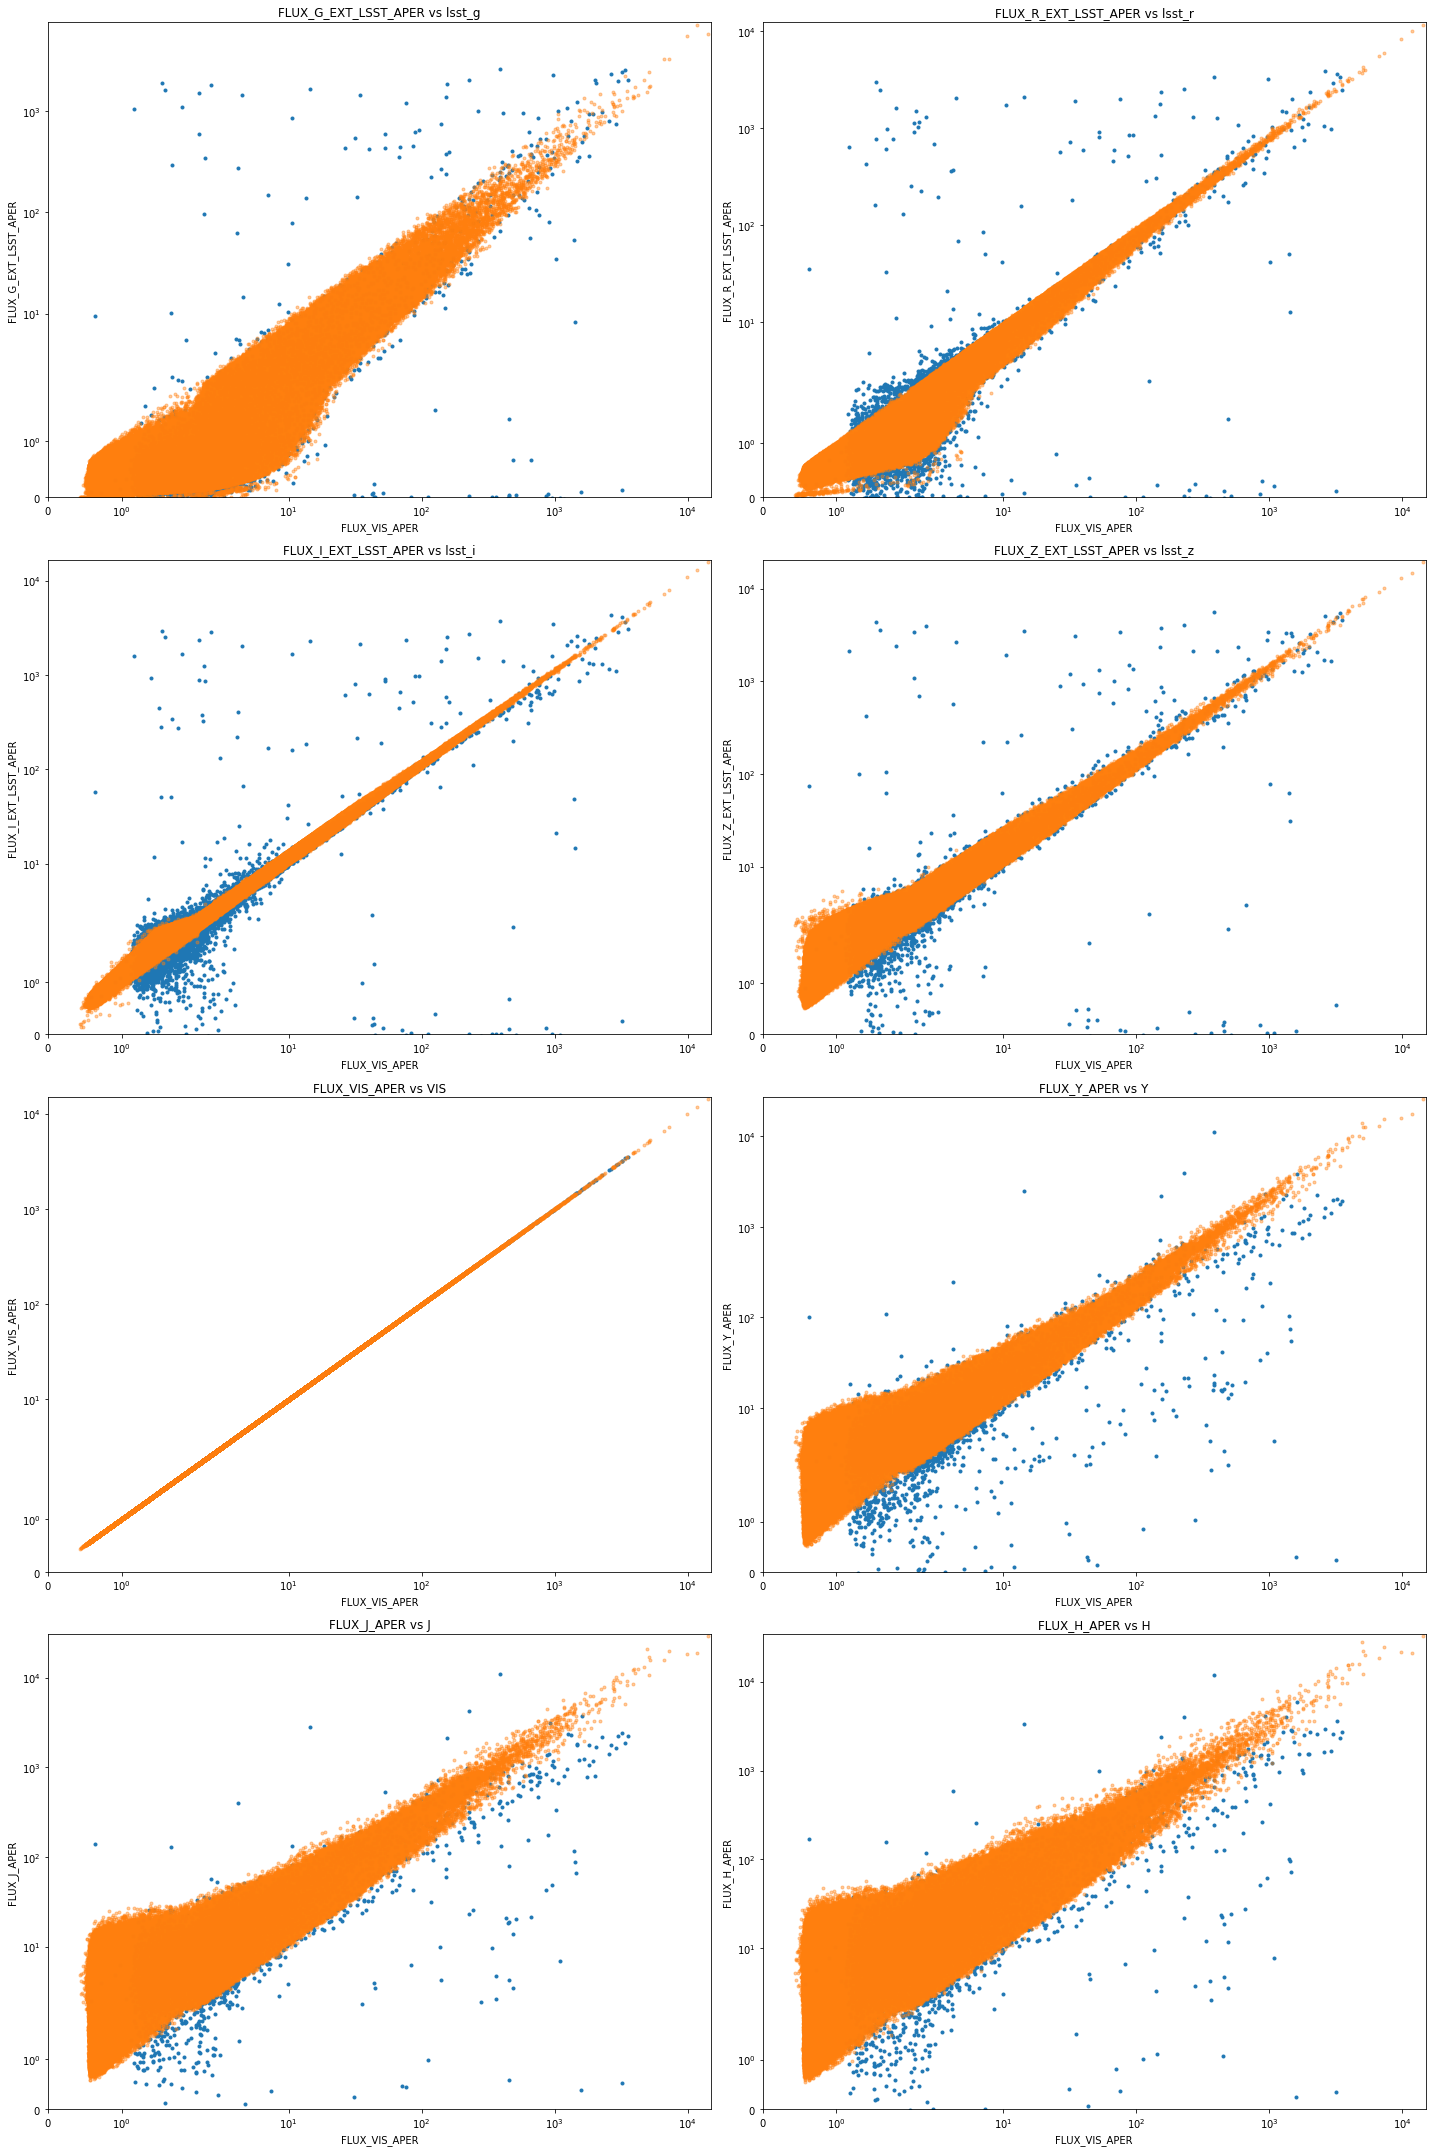

In [23]:
ncols = 2
nrows = n_filters // ncols + (n_filters % ncols > 0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 30))
axes = axes.ravel()

for i, (flux, error) in enumerate(target_catalog_filters):
    axes[i].scatter(t['FLUX_VIS_APER'], t[flux], marker='.')
    ref_name = reference_sample_phot_filters[i]
    axes[i].scatter(ref_photo['VIS'], ref_photo[ref_name], marker='.', alpha=0.4)
    axes[i].set_title(f'{flux} vs {ref_name}')
    axes[i].set_xlabel('FLUX_VIS_APER')
    axes[i].set_ylabel(flux)
    axes[i].set_xlim(0)
    axes[i].set_ylim(0)
    axes[i].set_xscale('symlog')
    axes[i].set_yscale('symlog')
    
plt.tight_layout()